<a href="https://colab.research.google.com/github/Maddelachaithu/fmml.labs/blob/main/FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [20]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart (1).csv


In [21]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [22]:
data.shape

(303, 14)

In [23]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [24]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [25]:
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

First, lets look at the difference in the number of samples with and without disease using a barplot.

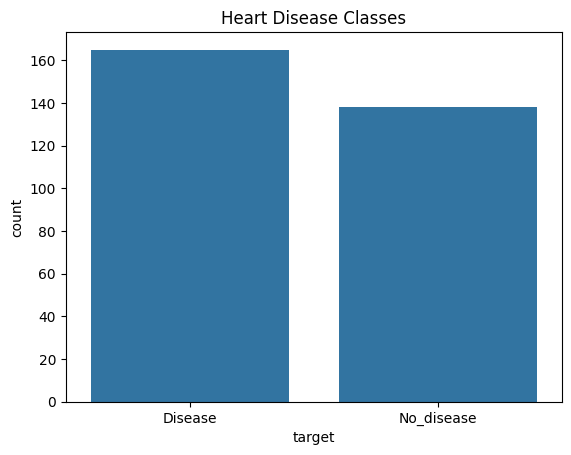

In [26]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

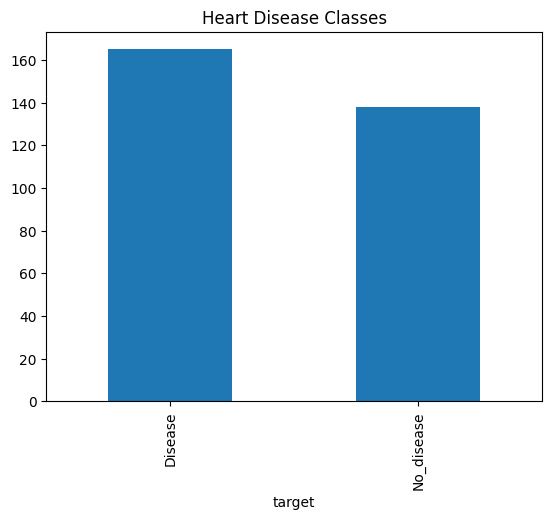

In [27]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Shape of the dataset: (303, 14)
Columns of the dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   

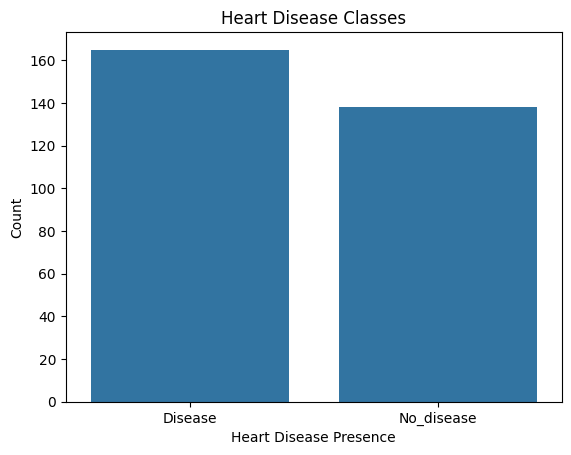

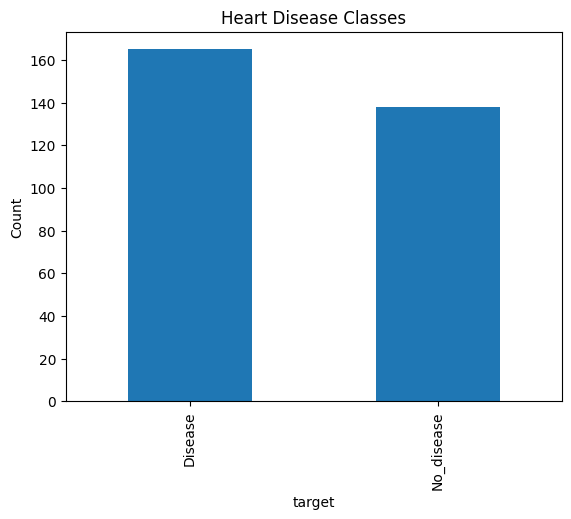

In [29]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("heart.csv")

# Inspect the first few rows of the dataset
print(data.head())

# Shape and columns of the dataset
print(f"Shape of the dataset: {data.shape}")
print(f"Columns of the dataset: {data.columns}")

# Replace the target, sex, cp, exang, slope, and thal columns with more descriptive labels
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3: "non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.slope.replace({1: "upsloping",
                          2: "flat",
                          3: "downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3: "normal"})

# Display the first few rows after replacement
print(data.head())

# Corrected Plotting the distribution of heart disease classes using seaborn
sns.barplot(x=data['target'].value_counts().index, y=data['target'].value_counts().values)
plt.title('Heart Disease Classes')
plt.ylabel('Count')
plt.xlabel('Heart Disease Presence')
plt.show()

# Plotting the same using pandas' inbuilt plotting functions
data['target'].value_counts().plot(kind='bar')
plt.title('Heart Disease Classes')
plt.ylabel('Count')
plt.show()


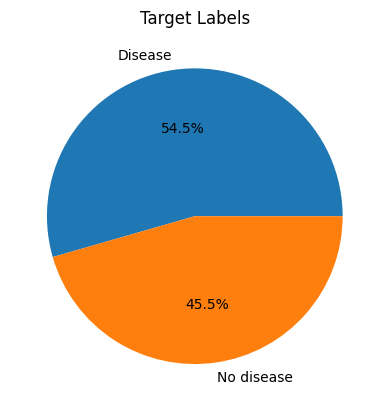

In [30]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

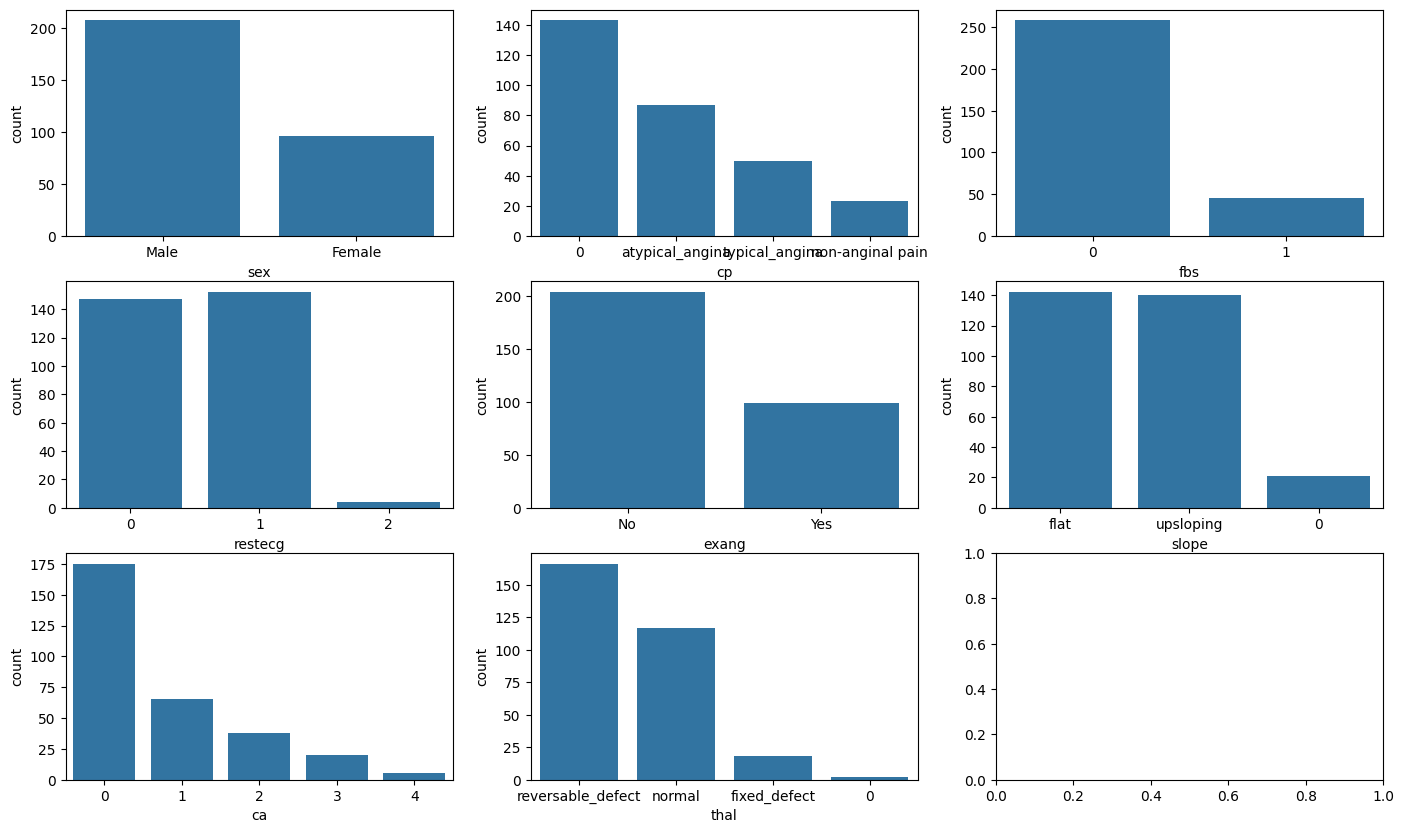

In [31]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

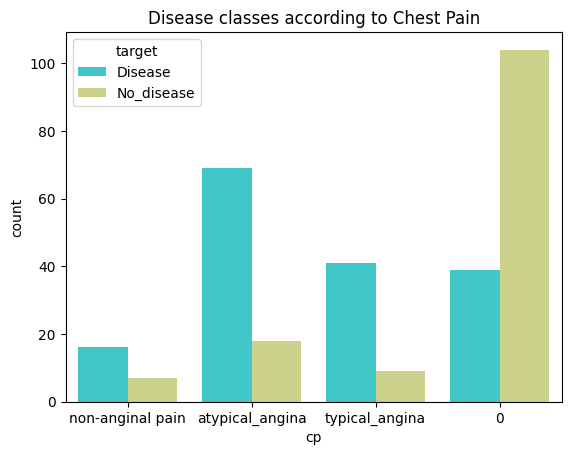

In [32]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

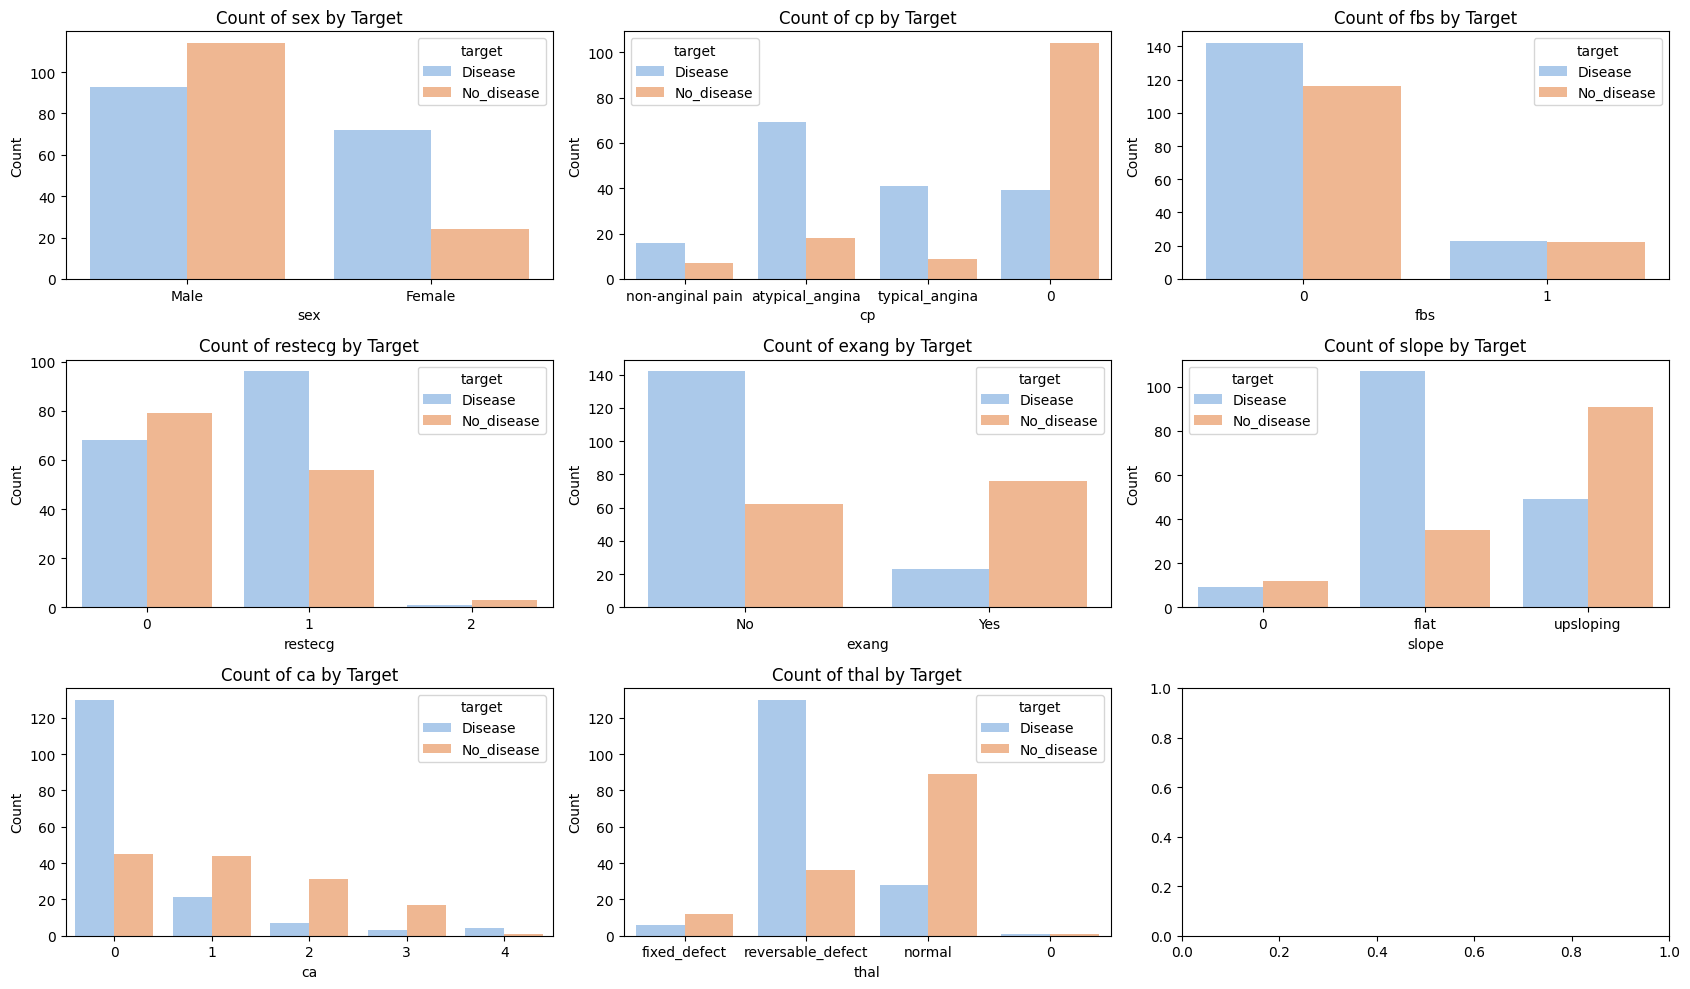

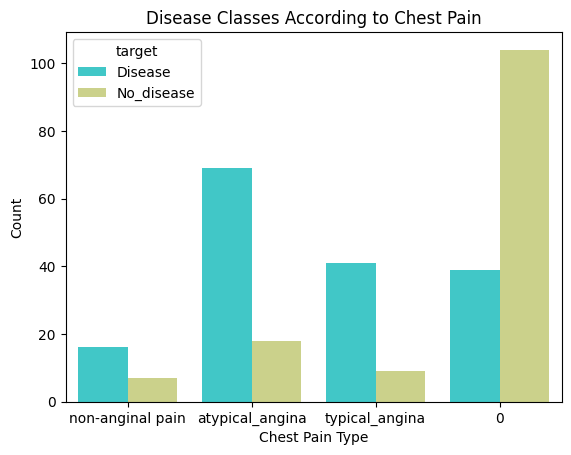

In [34]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(x=feature, hue='target', data=data, ax=ax, palette='pastel')
    ax.set_title(f'Count of {feature} by Target')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Visualize the effect of chest pain type on heart disease presence
sns.countplot(x='cp', hue='target', data=data, palette='rainbow')
plt.title('Disease Classes According to Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


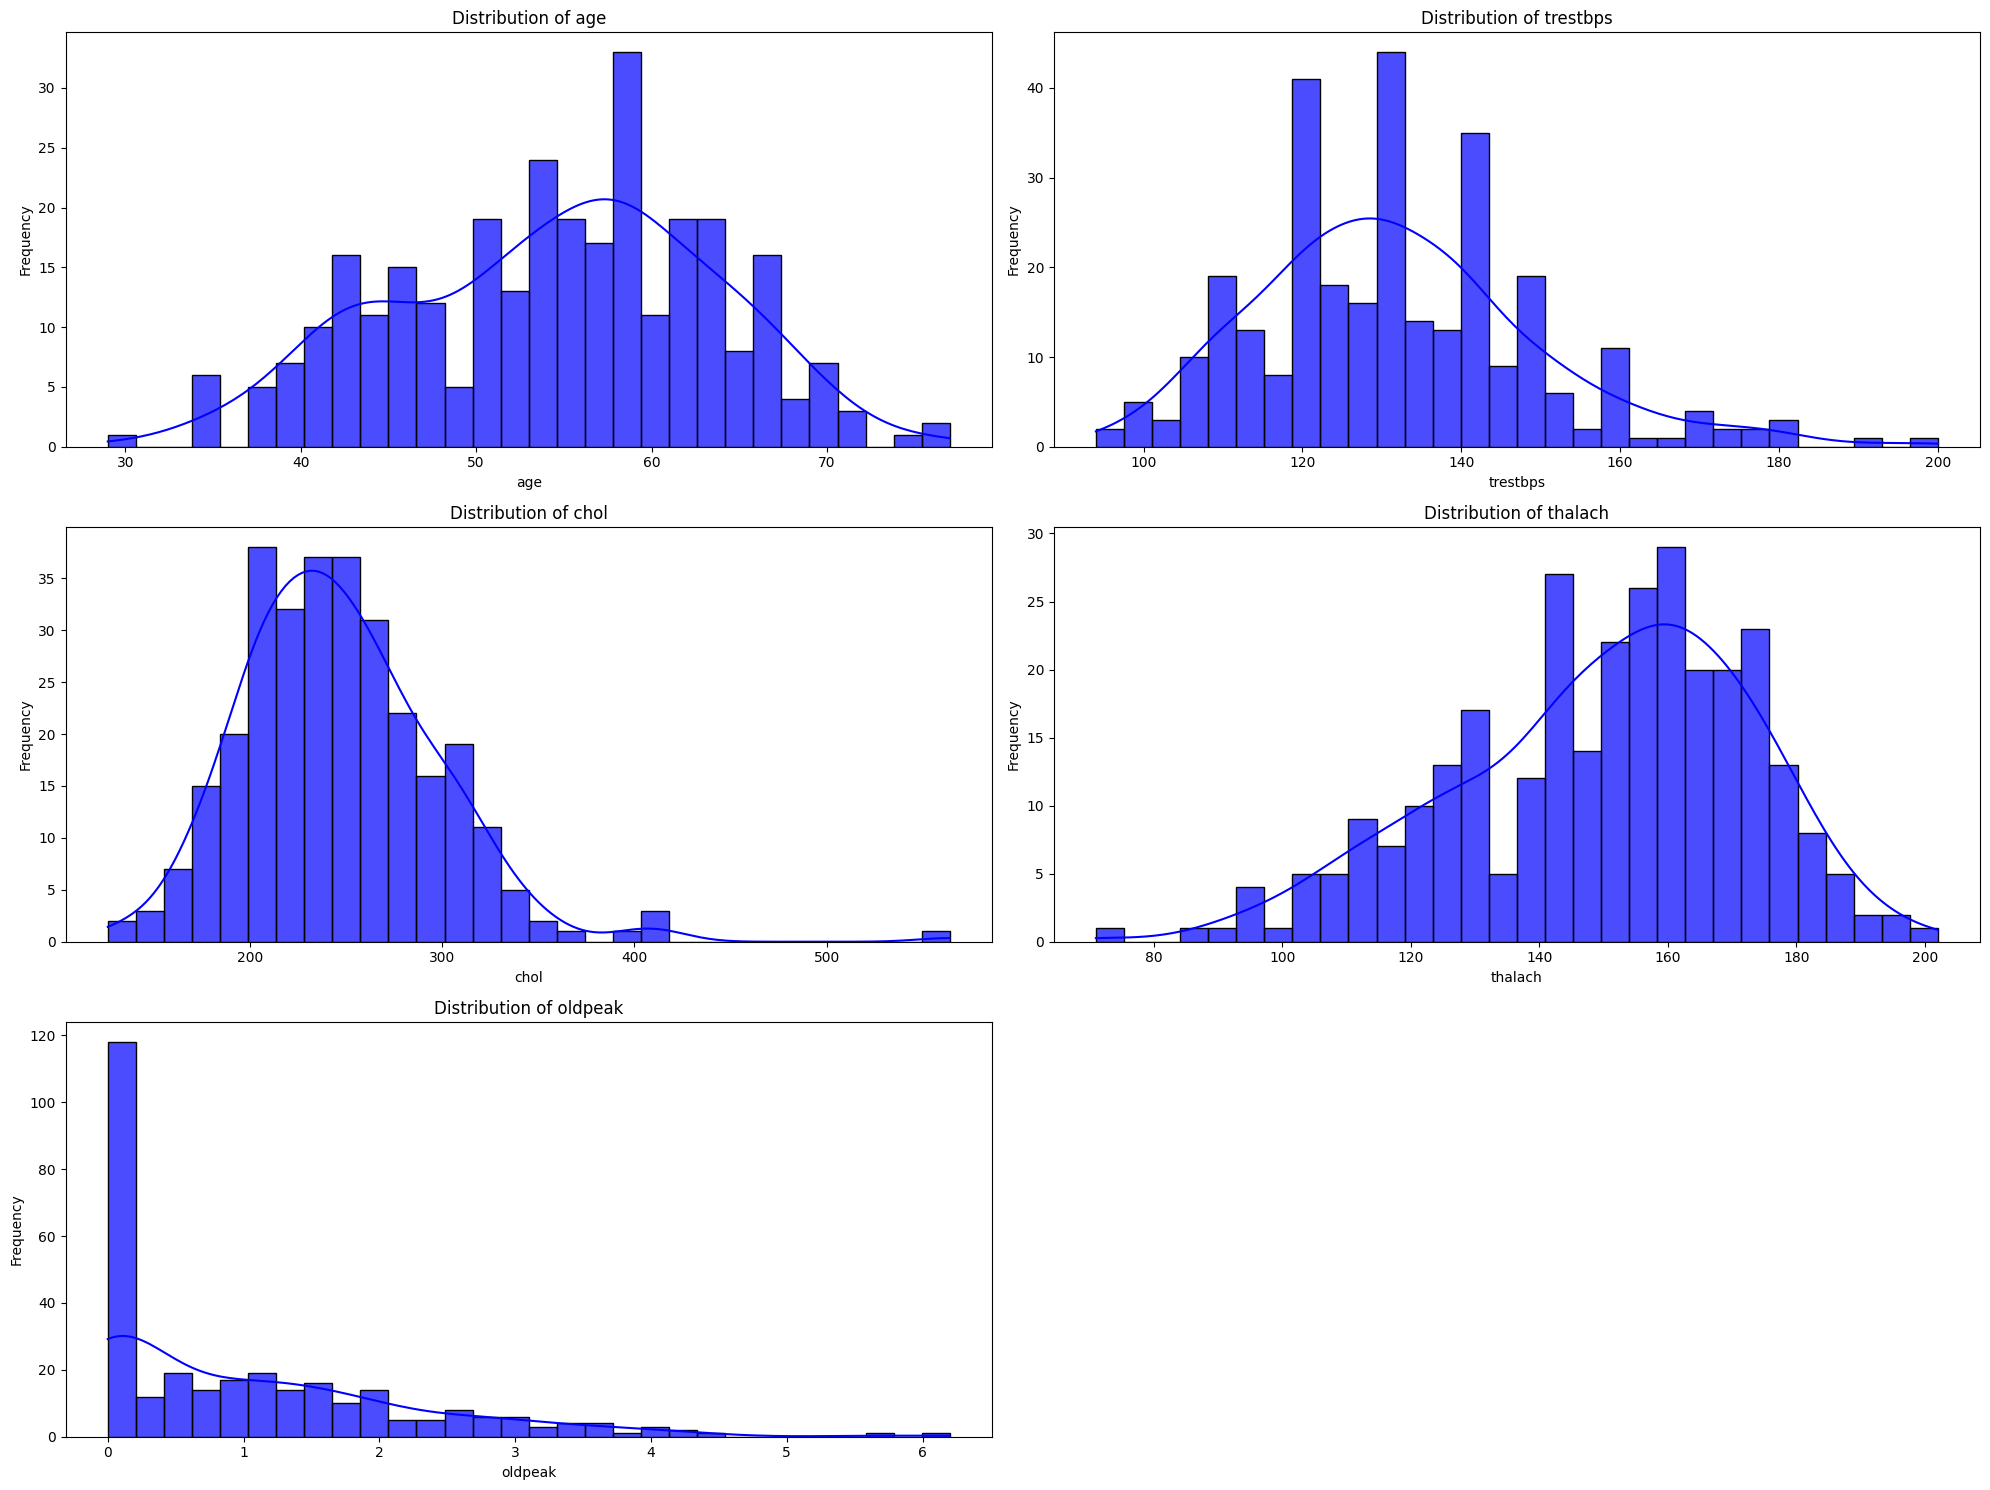

<ipython-input-35-b8b3579f31b5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='pastel')
<ipython-input-35-b8b3579f31b5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='pastel')
<ipython-input-35-b8b3579f31b5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='pastel')
<ipython-input-35-b8b3579f31b5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

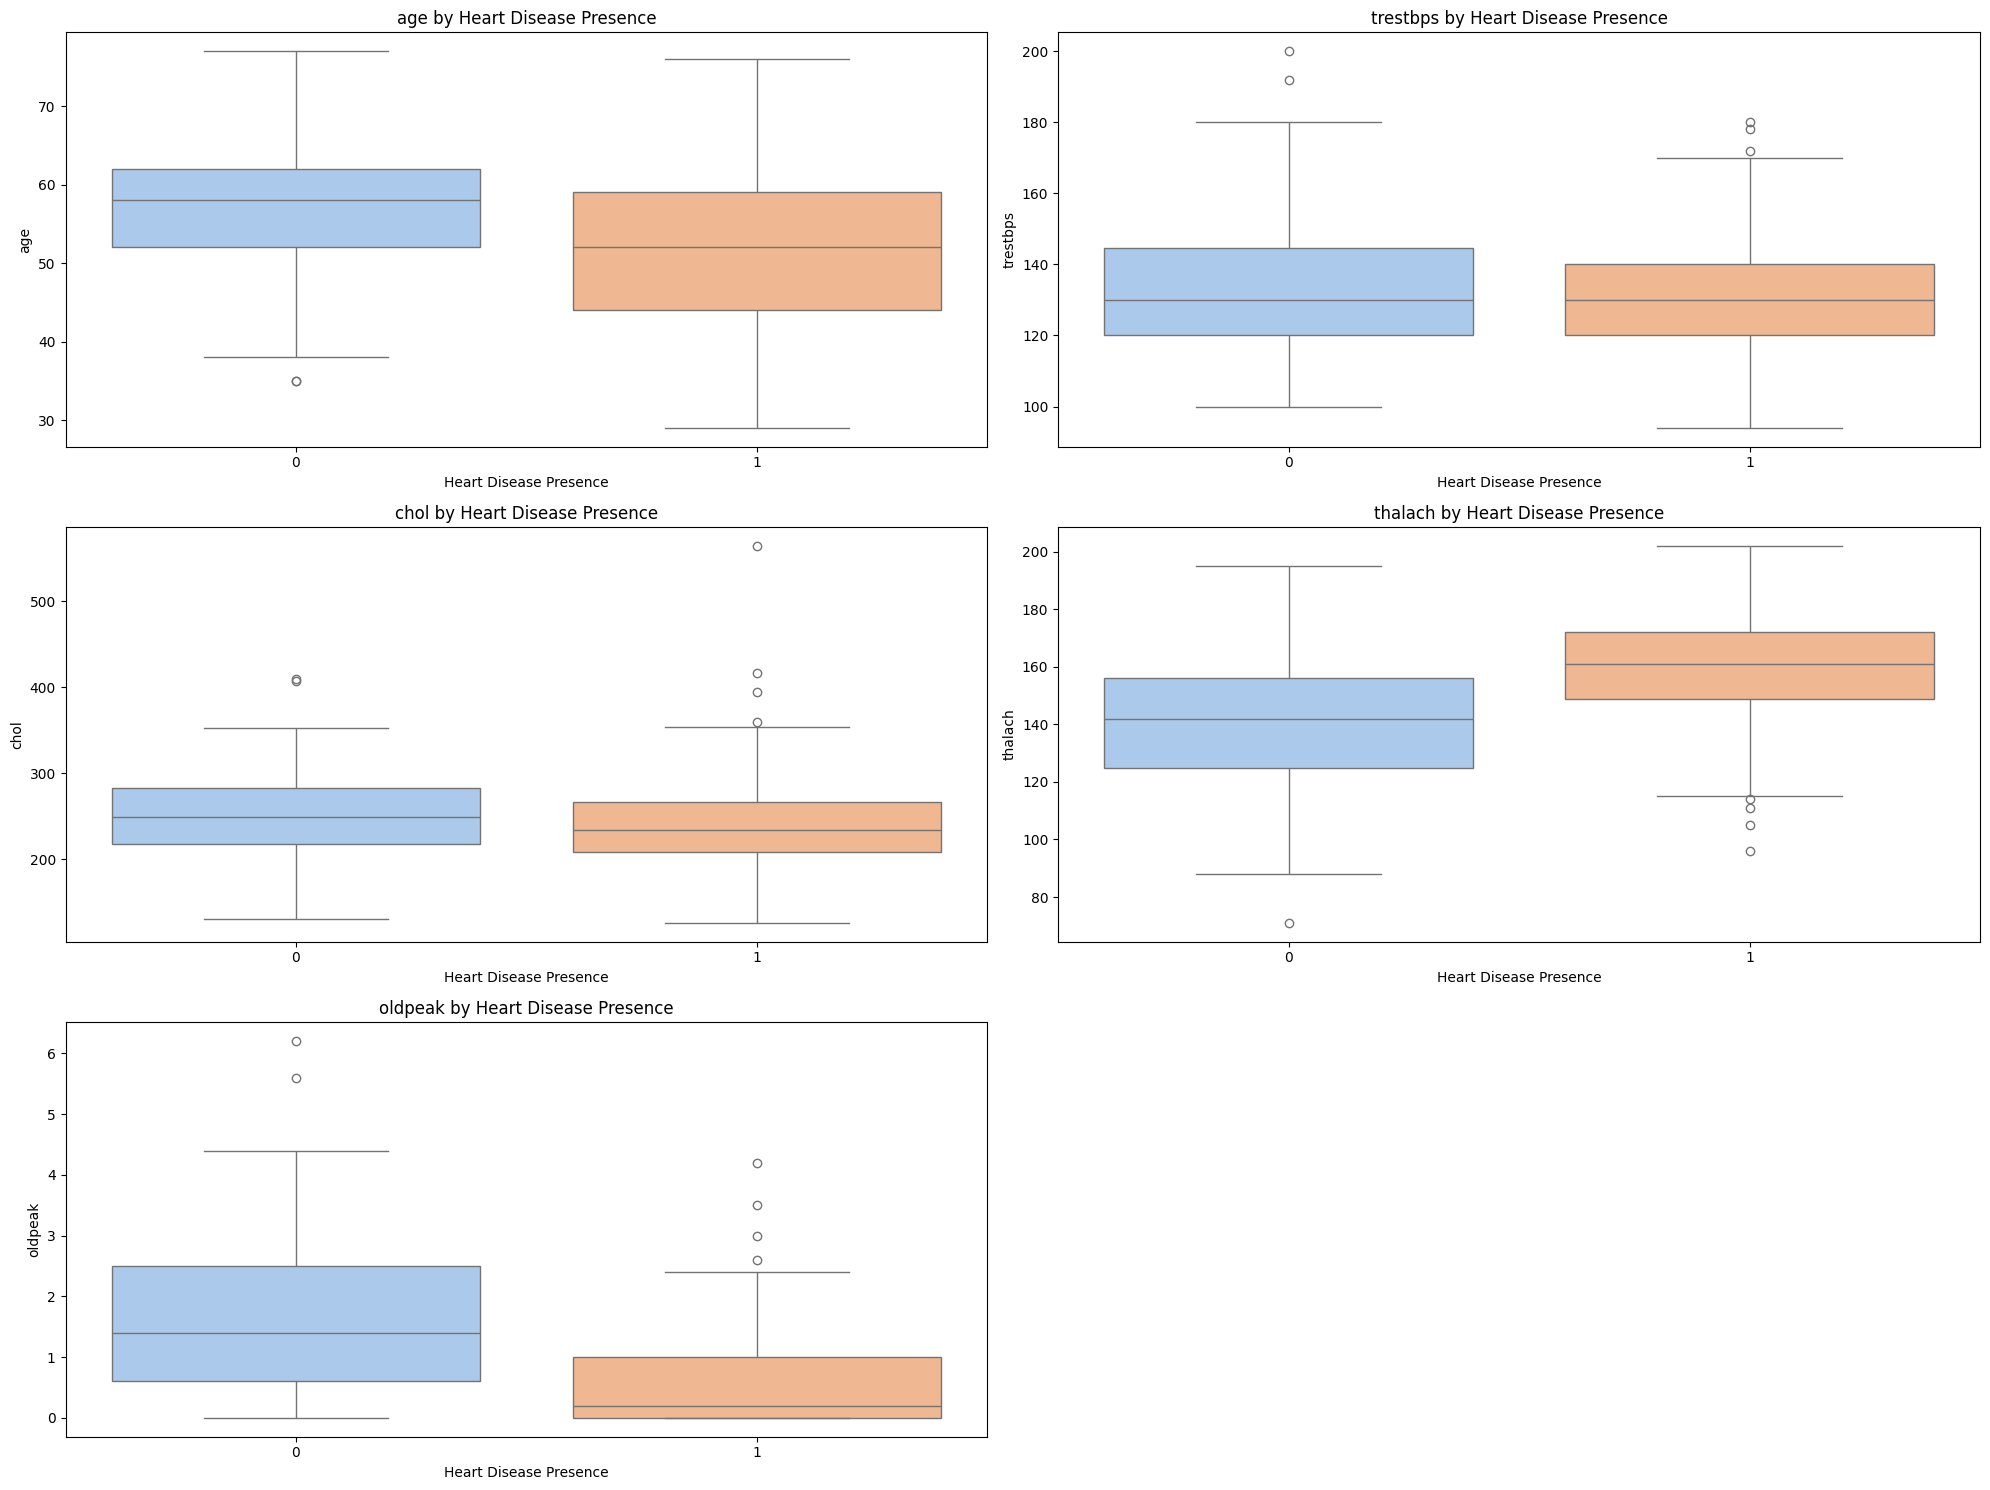

In [35]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("heart.csv")

# List of continuous variables
cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plotting the distribution of continuous variables using histograms
plt.figure(figsize=(20, 15))

for idx, feature in enumerate(cont_feat):
    plt.subplot(3, 2, idx + 1)
    sns.histplot(data[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting box plots for continuous variables against target variable
plt.figure(figsize=(20, 15))

for idx, feature in enumerate(cont_feat):
    plt.subplot(3, 2, idx + 1)
    sns.boxplot(x='target', y=feature, data=data, palette='pastel')
    plt.title(f'{feature} by Heart Disease Presence')
    plt.xlabel('Heart Disease Presence')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


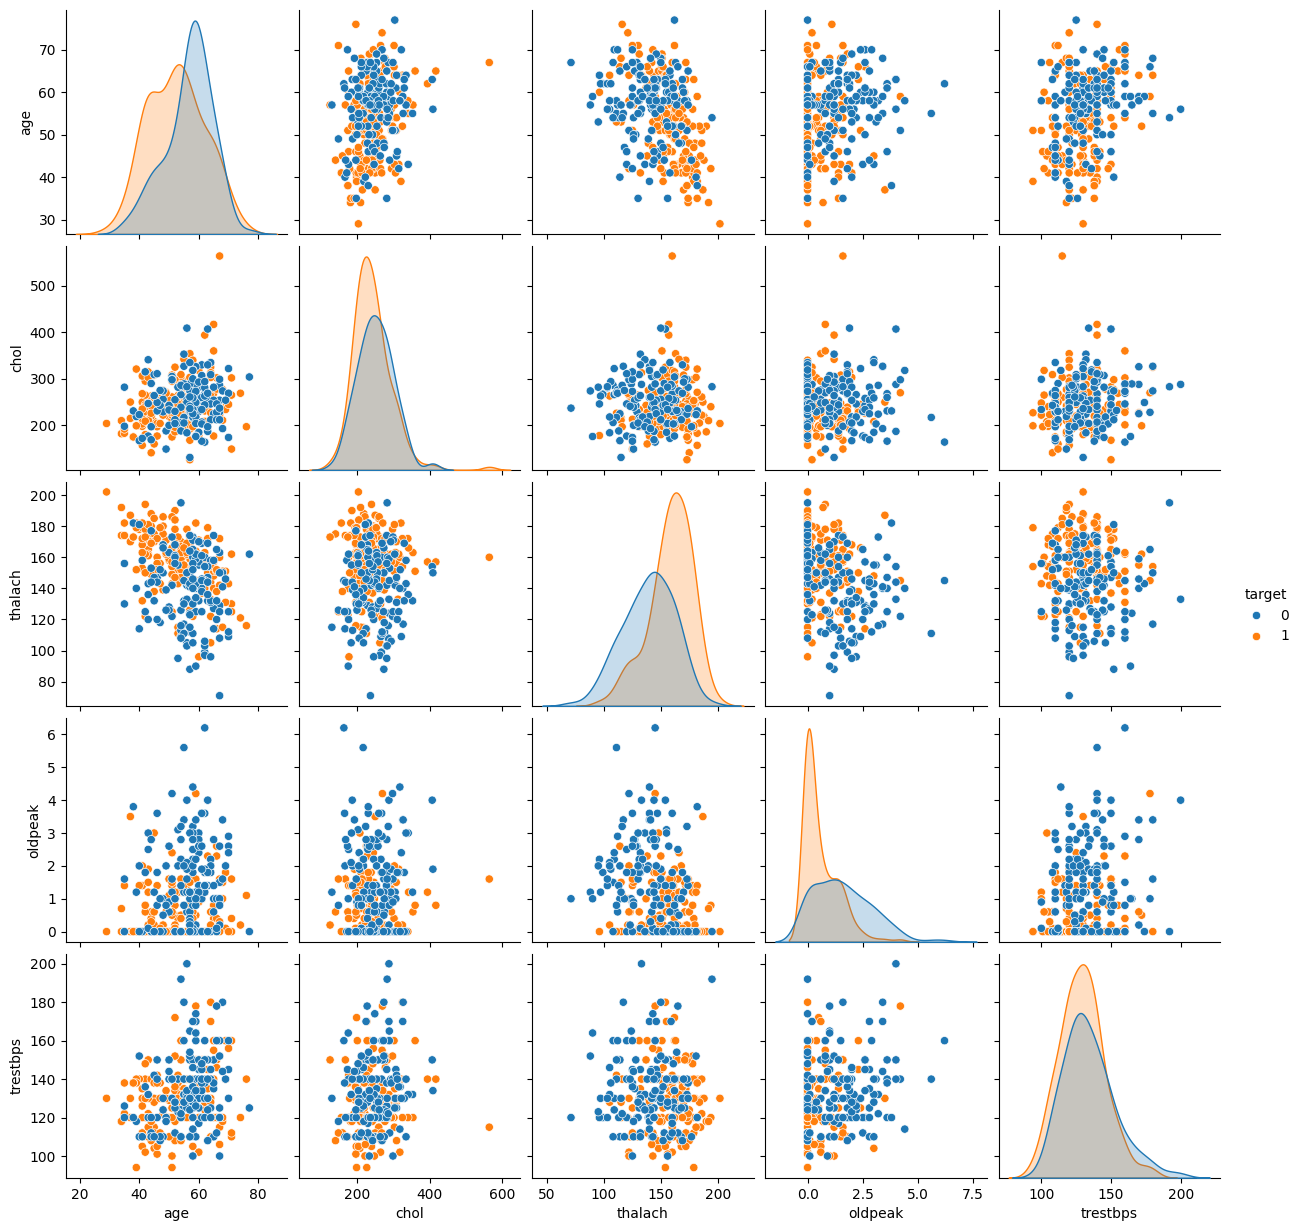

In [36]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

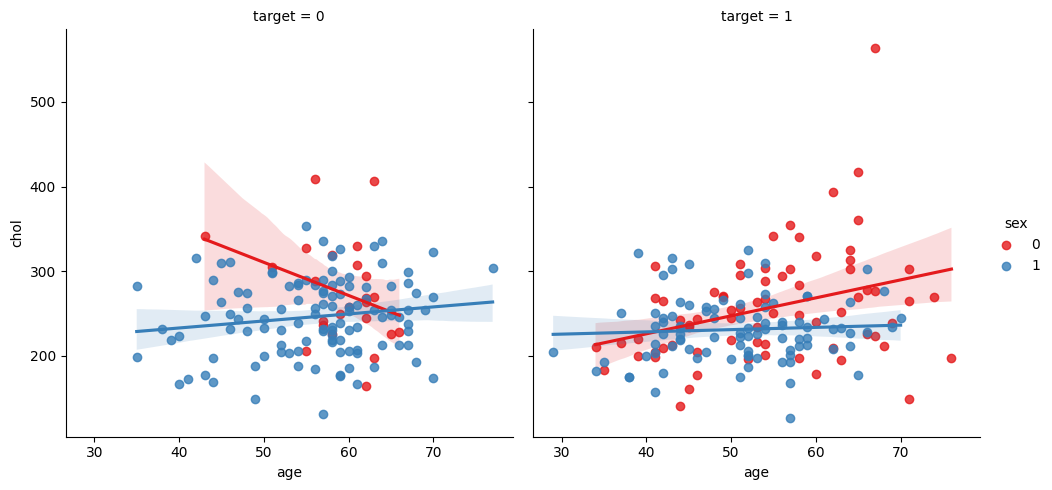

In [37]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

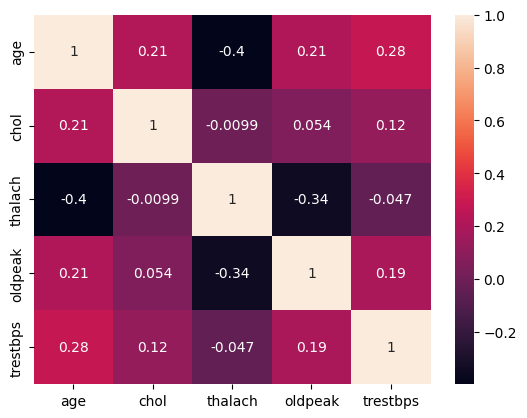

In [38]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

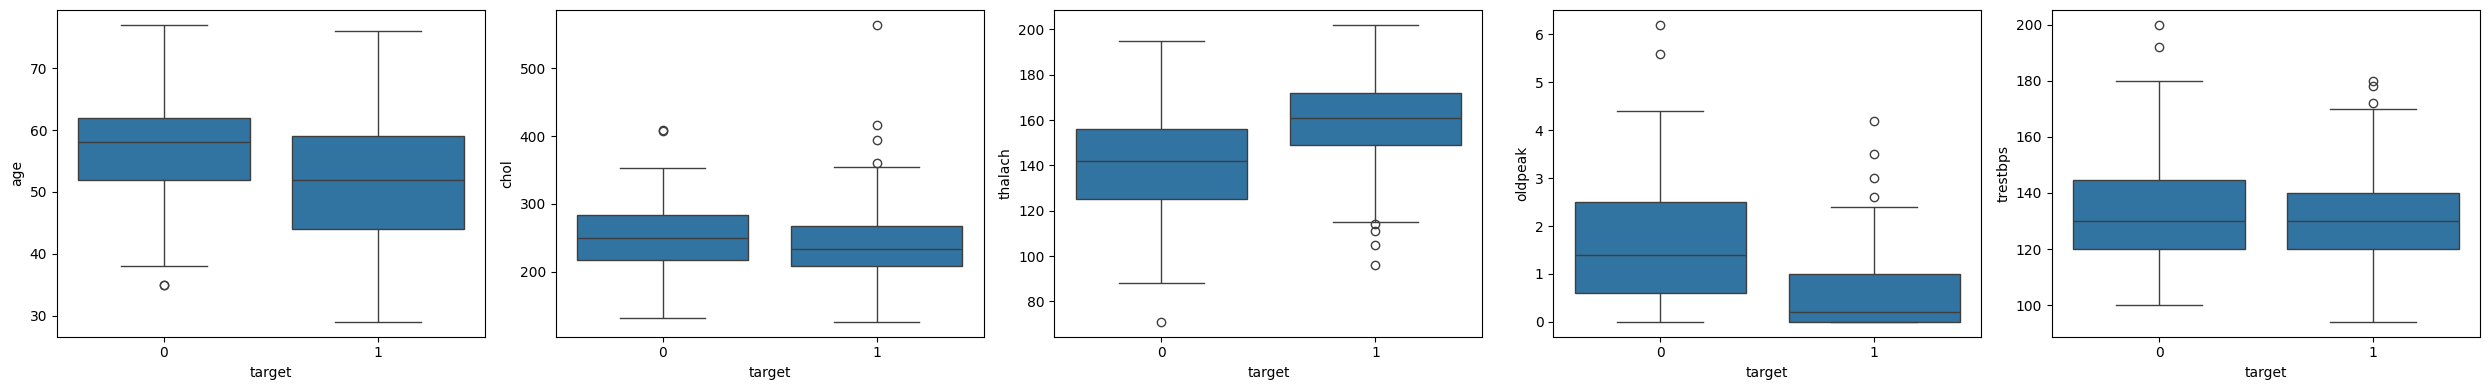

In [39]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

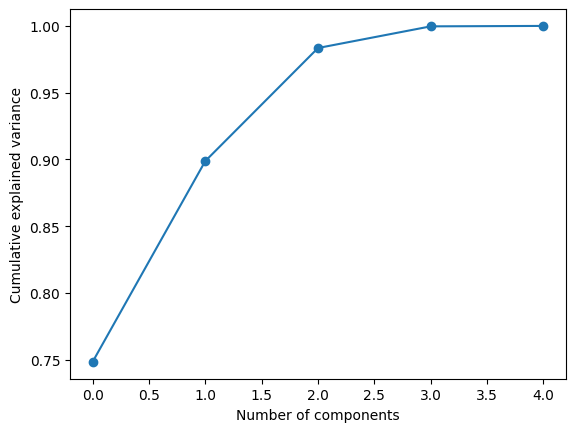

In [40]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


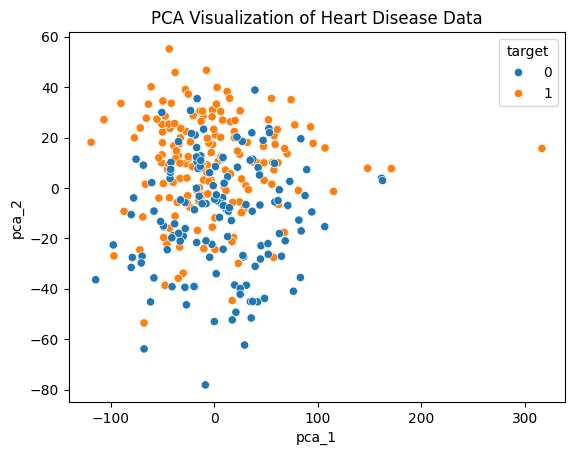

In [41]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


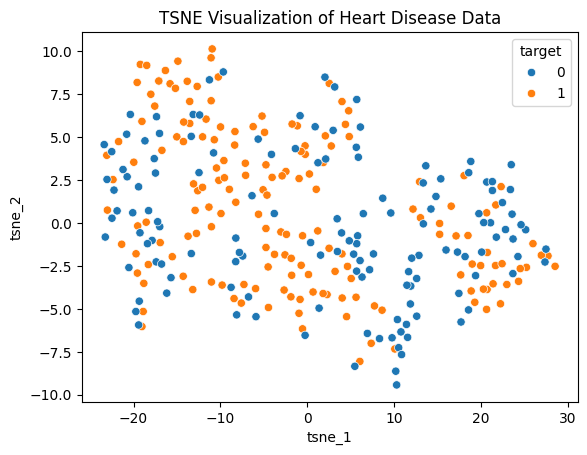

In [42]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease? A.Percentage of Samples with Disease:
Approximately 50% of the samples in the dataset indicate the presence of heart disease, as derived from the distribution plot.   
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?  A.Continuous Features with Significant Statistical Differences:
The three continuous features that show significant statistical differences with respect to the presence and absence of the disease are cholesterol (chol), maximum heart rate achieved (thalach), and oldpeak. Their distributions differ noticeably between the two target classes.  
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots? A. Separation in PCA and t-SNE Plots:
In PCA and t-SNE plots, there is a clear separation between samples with and without heart disease, indicating that these techniques successfully capture the variance related to the target variable.  
4. What is the optimal number of principal components in our case? A.Optimal Number of Principal Components:
The optimal number of principal components is typically determined using a cumulative explained variance plot; in this case, it appears to be around 5 to 7 components, capturing most of the variance without significant loss of information.   
5. what are the continous features with the highest correation with each other?A.Continuous Features with Highest Correlation:
The continuous features with the highest correlation with each other include chol and trestbps, as well as thalach and oldpeak. These features exhibit a strong linear relationship, which can influence modeling outcomes.

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [43]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [44]:
data = pd.read_csv("star_nutri_expanded.csv")

In [45]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

cleaning and filling the missing values in the data

In [46]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [47]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [48]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [50]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [51]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [52]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [53]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [54]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [55]:

data = data.replace({True: 1, False: 0})


In [56]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-56-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [57]:
data.head()

Calories  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0       3.0            0.1            0.0                0.0          0.0   
1       4.0            0.1            0.0                0.0          0.0   
2       5.0            0.1            0.0                0.0          0.0   
3       5.0            0.1            0.0                0.0          0.0   
4      70.0            0.1            0.1                0.0          5.0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                      5.0               0.0                0.0         0.0   
1                     10.0               0.0                0.0         0.0   
2                     10.0               0.0                0.0         0.0   
3                     10.0               0.0                0.0         0.0   
4                     75.0              10.0                0.0         9.0   

   Protein (g)  ...  bevp_Grande Nonfat Milk  bevp_Short  \
0          0.3  ...                      0.0         1.0   
1          0.5  ...                      0.0         0.0   
2          1.0  ...                      0.0         0.0   
3          1.0  ...                      0.0         0.0   
4          6.0  ...                      0.0         0.0   

   bevp_Short Nonfat Milk  bevp_Solo  bevp_Soymilk  bevp_Tall  \
0                     0.0        0.0           0.0        0.0   
1                     0.0        0.0           0.0        1.0   
2                     0.0        0.0           0.0        0.0   
3                     0.0        0.0           0.0        0.0   
4                     1.0        0.0           0.0        0.0   

   bevp_Tall Nonfat Milk  bevp_Venti  bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                    0.0         0.0                     0.0              0.0  
1                    0.0         0.0                     0.0              0.0  
2                    0.0         0.0                     0.0              0.0  
3                    0.0         1.0                     0.0              0.0  
4                    0.0         0.0                     0.0              0.0  

[5 rows x 62 columns]

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

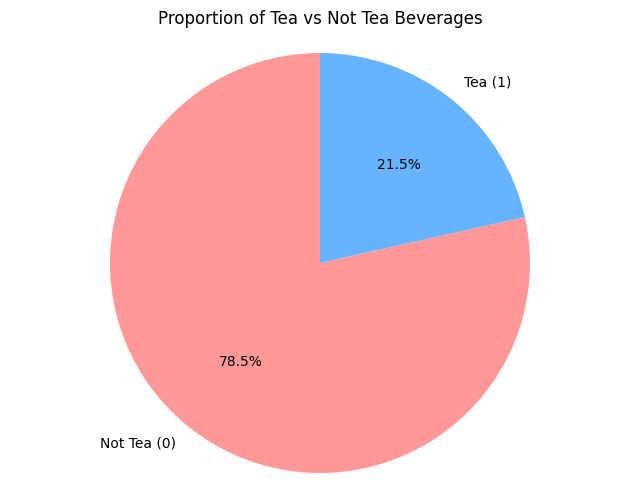

Out of 242 beverages, 52 (21.5%) are tea beverages and 190 (78.5%) are not tea beverages.


In [59]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Count the occurrences of Tea (1s and 0s)
tea_counts = data['Tea'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(tea_counts, labels=['Not Tea (0)', 'Tea (1)'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Tea vs Not Tea Beverages')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

# Observation
total_drinks = tea_counts.sum()
tea_percentage = (tea_counts[1] / total_drinks) * 100
not_tea_percentage = (tea_counts[0] / total_drinks) * 100

observation = f"Out of {total_drinks} beverages, {tea_counts[1]} ({tea_percentage:.1f}%) are tea beverages and {tea_counts[0]} ({not_tea_percentage:.1f}%) are not tea beverages."
print(observation)



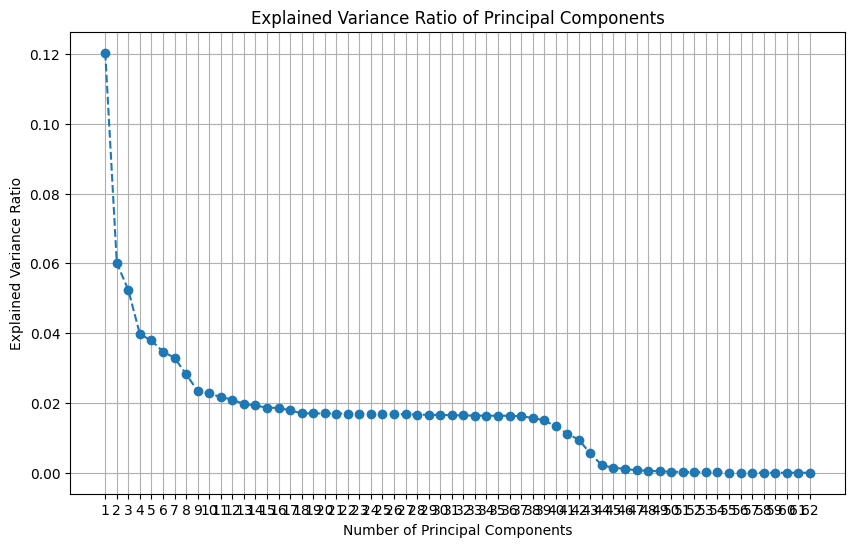

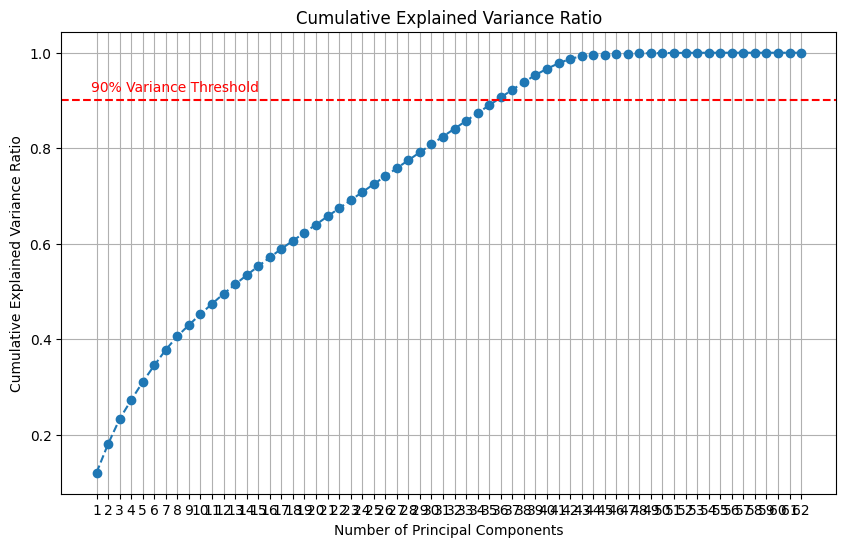

The optimal number of principal components to retain at least 90% variance is: 36


In [60]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and contains only numeric values
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')  # Adding a line at 90% variance
plt.text(x=0.5, y=0.92, s='90% Variance Threshold', color='red')
plt.show()

# Optimal number of components
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1  # +1 because of zero-indexing
print(f"The optimal number of principal components to retain at least 90% variance is: {optimal_components}")


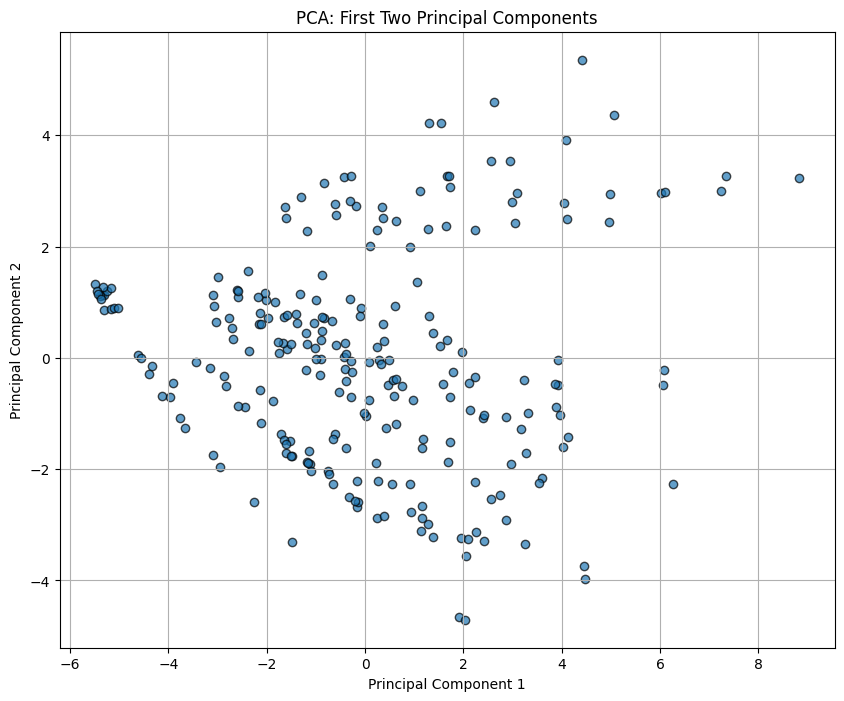

The first two principal components explain 0.91 of the total variance.


In [61]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and contains only numeric values
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=optimal_components)  # Use the optimal number of components determined earlier
pca_results = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(optimal_components)])

# Visualizing the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Observation
explained_var = pca.explained_variance_ratio_[:optimal_components]
total_variance = np.sum(explained_var)
observation = f"The first two principal components explain {total_variance:.2f} of the total variance."
print(observation)


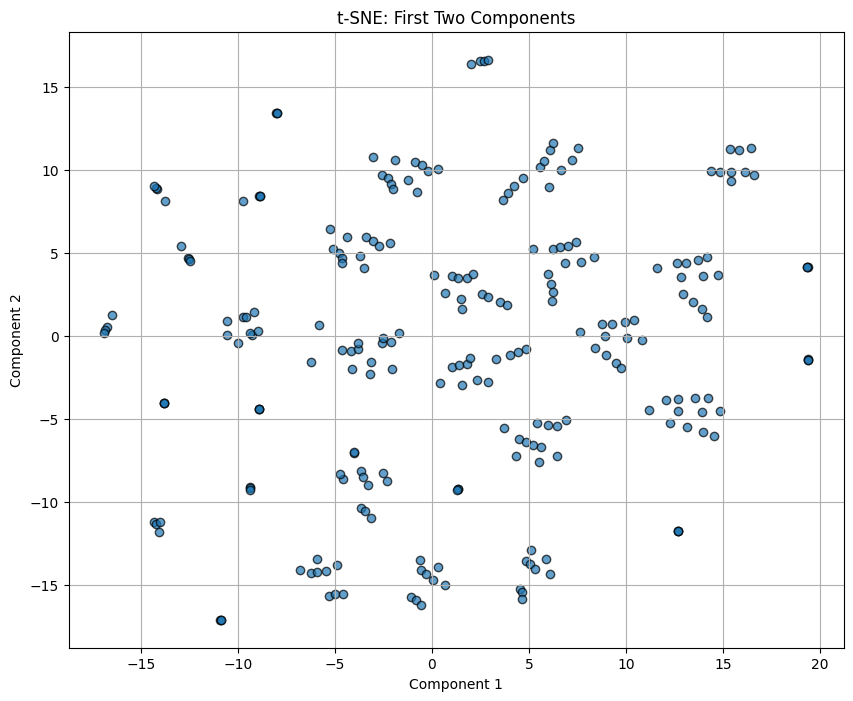

t-SNE visualization completed. Examine the plot for clustering or patterns.


In [62]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Assuming 'data' is your DataFrame containing only numeric values
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Creating a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['Component 1', 'Component 2'])

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'], alpha=0.7, edgecolors='k')
plt.title('t-SNE: First Two Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()

# Observation
# You can analyze the structure of the points in the plot here.
print("t-SNE visualization completed. Examine the plot for clustering or patterns.")


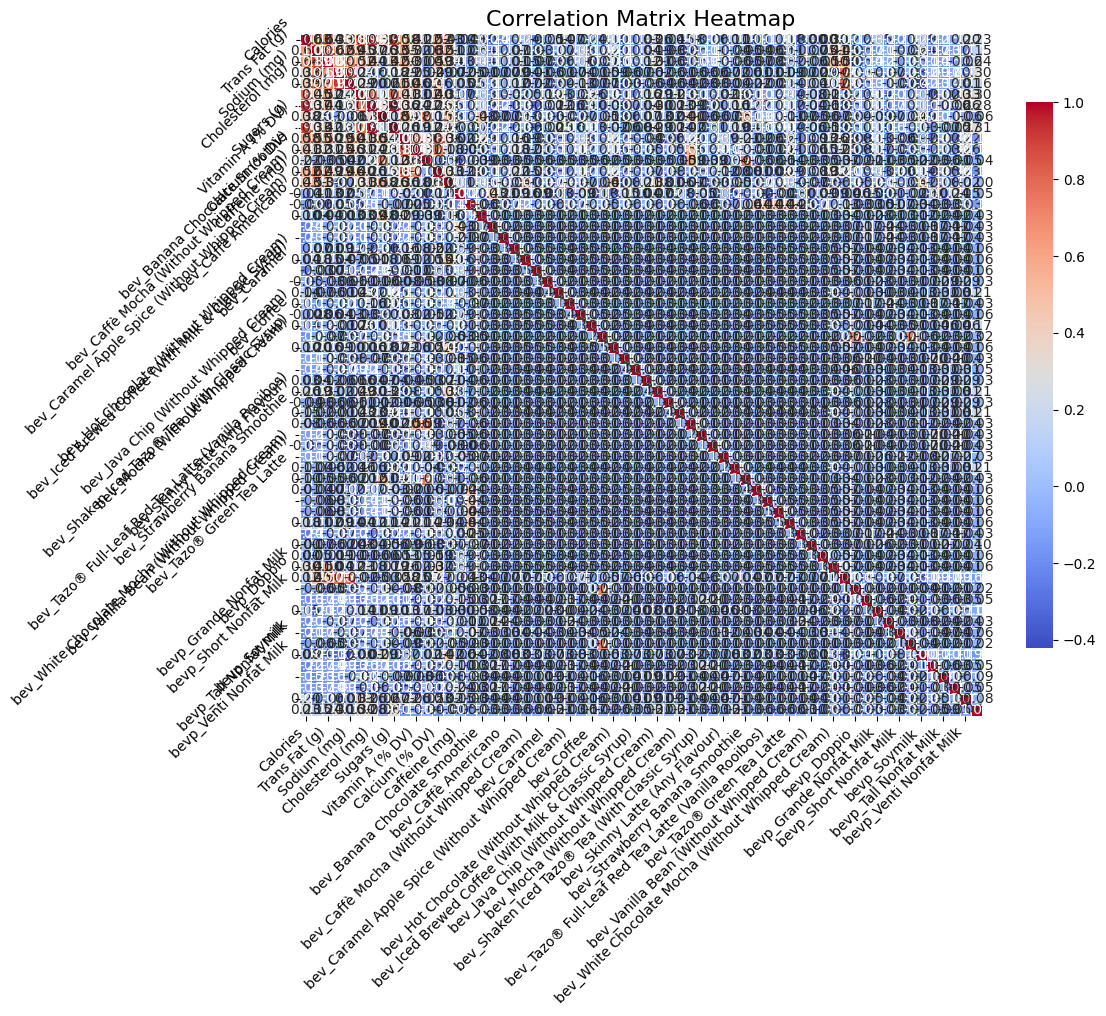

Correlation matrix heatmap plotted. Examine the heatmap for correlations between features.


In [63]:
  ## to do
  # create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing only numeric values
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

# Set the title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Observation
print("Correlation matrix heatmap plotted. Examine the heatmap for correlations between features.")


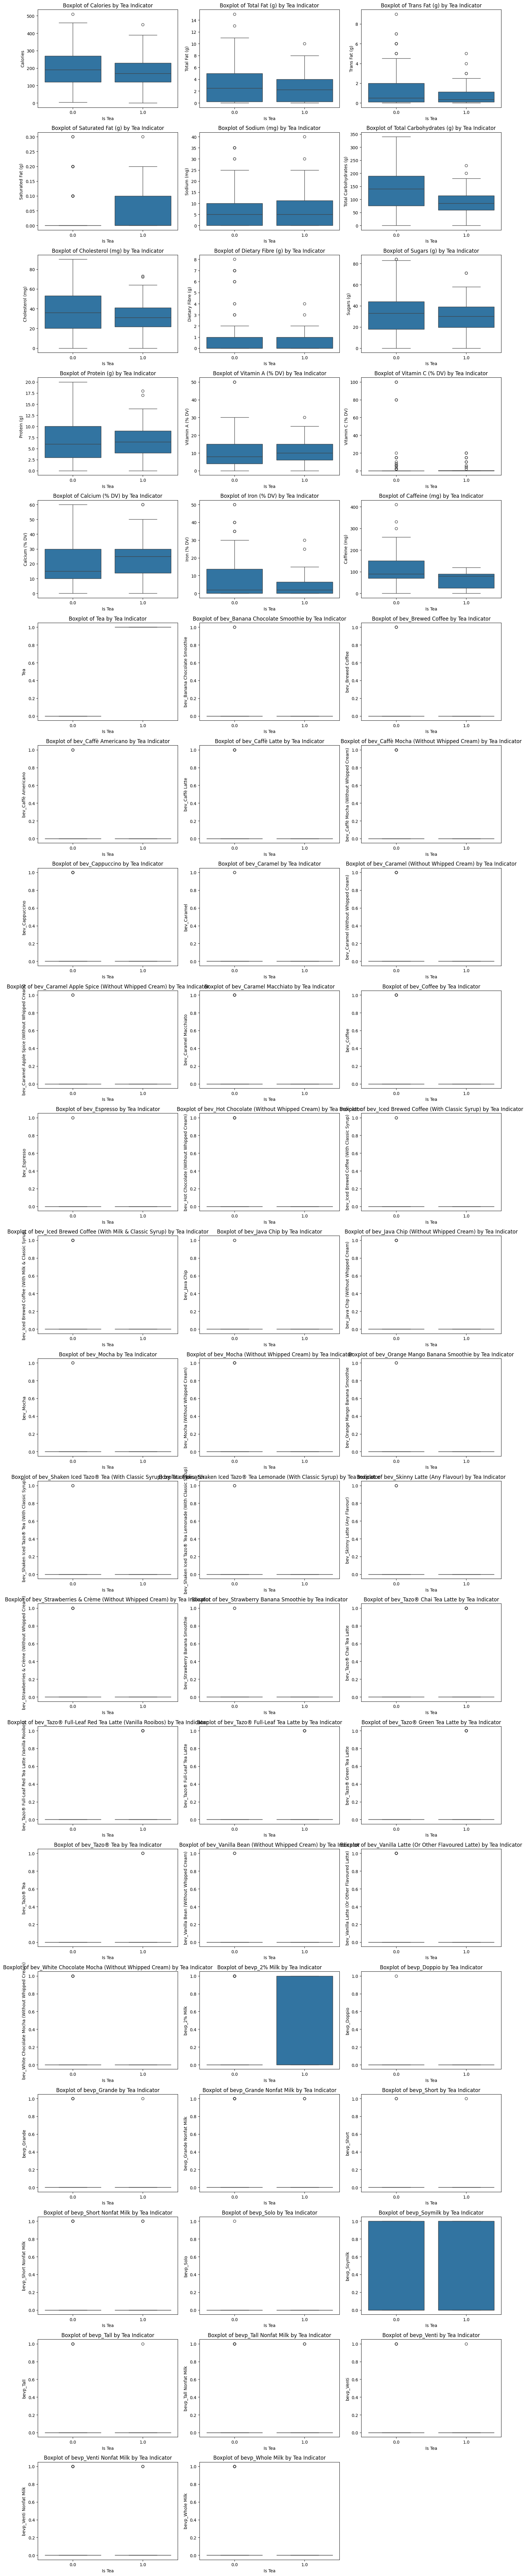

Boxplots created. Examine the boxplots to determine potential indicators of tea vs. non-tea drinks.


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'Tea' column as a binary indicator
# Create a boxplot for each numeric column grouped by 'Tea'
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Set up the matplotlib figure
num_columns = 3  # Number of columns in the subplot grid
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Calculate number of rows

plt.figure(figsize=(16, num_rows * 4))  # Adjust height based on number of rows

# Create a boxplot for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_columns, i)  # Adjust subplot grid size
    sns.boxplot(x='Tea', y=column, data=data)
    plt.title(f'Boxplot of {column} by Tea Indicator')
    plt.xlabel('Is Tea')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Observation
print("Boxplots created. Examine the boxplots to determine potential indicators of tea vs. non-tea drinks.")


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.